# Assignment 1

- Author: Marvin Lomo
- Date: 9/5/2023
- Output: Jupyter Notebook


## Loading the Dataset and Relevant Libraries


In [1]:
# Loading the tidyverse library
library(tidyverse)
# Loading the nyc flight 13 library
library(nycflights13)

# loading the flights dataset
flights_df <- flights

# Preview the data
glimpse(flights_df)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

## Question 1.1

In [93]:
flights_df |>
    # Grouping by carriers
    group_by(carrier) |>
    # Summarise each group by the average dep_delay
    summarise(avg_dep_delay = mean(dep_delay, na.rm=TRUE)) |>
    # Arrange in descending order
    arrange(desc(avg_dep_delay)) |>
    # Select the top 3
    head(3)
    
    

carrier,avg_dep_delay
<chr>,<dbl>
F9,20.21554
EV,19.95539
YV,18.99633


## Question 1.2 

In [97]:
flights_df |>
    # Filtering for records of the top 3 Carriers
    filter(carrier %in% c('F9', 'EV', 'YV')) |>
    # Group by carrier and month
    group_by(carrier, month) |>
    # Monthly average for the selected carries
    summarise(avg_dep_delay = mean(dep_delay, na.rm=TRUE)) |>
    # Using pivot_wider to place the carriers side-by-side
    pivot_wider(names_from = carrier, values_from = avg_dep_delay)
    

`summarise()` has grouped output by 'carrier'. You can override using the `.groups` argument.


month,EV,F9,YV
<int>,<dbl>,<dbl>,<dbl>
1,24.228879,10.000000,15.846154
2,21.523328,29.770833,10.673913
3,26.169820,16.754386,31.888889
4,22.767549,24.631579,27.111111
5,20.242477,35.948276,15.409091
6,25.496834,29.436364,42.794872
7,26.504722,31.810345,22.434783
8,16.261828,22.218182,19.066667
9,8.237970,8.263158,8.880952


## Question 1.3



In [4]:
flights_df |>
    # Using the by syntax to group and summarise
    summarise(.by=month,
             avg_dep = mean(dep_delay, na.rm=TRUE)) |>
    # Arrange by the avg_dep in desc order
    arrange(desc(avg_dep)) |>
    # Select the top 3
    head(3)

month,avg_dep
<int>,<dbl>
7,21.72779
6,20.84633
12,16.57669


## Question 1.4



In [99]:
flights_df |>
    # Grouping by Carriers and Counting the unique origins
    summarise(.by=carrier, unique_orgin_count=n_distinct(origin)) |>
    # Filter for Records where only unique origin count is 3
    filter(unique_orgin_count == 3)
    

carrier,unique_orgin_count
<chr>,<int>
UA,3
AA,3
B6,3
DL,3
EV,3
MQ,3
US,3
9E,3


## Question 1.5 Solution

In [6]:
flights |>
    # group by Destination and find the avg departure delay
    summarise(.by=dest, avg_dep=mean(dep_delay, na.rm=TRUE)) |>
    # Arrange in ascending order of average departure
    arrange(avg_dep) |>
    # select the top 3
    head(3)

dest,avg_dep
<chr>,<dbl>
LEX,-9.000000
PSP,-2.944444
EYW,3.647059


## Question 1.6 Solution


In [7]:
# 1.6 Suppose you want to fly from New York to Tamp Florida (TPA). 
# a Which airport is expected to have the lowest average delay

flights_df |>
    # filter by the  Dest TPA
    filter(dest=='TPA') |>
    # Group by Airport and determine the average delay
    summarise(.by=origin, avg_dep=mean(dep_delay, na.rm=TRUE)) |>
    # Select the airport with the lowest average departure delay
    arrange(avg_dep) |>
    # Select lowest
    head(1)

origin,avg_dep
<chr>,<dbl>
LGA,11.28732


In [8]:
# 1.6 Suppose you want to fly from New York to Tamp Florida (TPA). 
# Which carrier has the lowest delay

flights_df |>
    # filter by the  Dest TPA
    filter(dest=='TPA') |>
    # Group by Carrier and determine the average delay
    summarise(.by=carrier, avg_dep=mean(dep_delay, na.rm=TRUE)) |>
    # Select the airport with the lowest average departure delay
    arrange(avg_dep) |>
    # Select lowest
    head(1)

carrier,avg_dep
<chr>,<dbl>
9E,-4.333333


In [9]:
# 1.6 Suppose you want to fly from New York to Tamp Florida (TPA). 
#  Finally, if you were to select a carrier from one of the three airports with 
# the lowest average flight delay for trips to Tampa, which carrier and airport would you choose?

flights_df |>
    # filter by the  Dest TPA
    filter(dest=='TPA') |>
    # Group by Airport and determine the average delay
    summarise(.by=c(carrier, origin), avg_dep=mean(dep_delay, na.rm=TRUE)) |>
    # Select the airport with the lowest average departure delay
    arrange(avg_dep) |>
    # Select lowest
    head(1)

carrier,origin,avg_dep
<chr>,<chr>,<dbl>
9E,JFK,-4.333333


## Question 1.7 Solution


In [10]:
# Assuming a penalty of $1000 for each delay exceeding 30 minutes, how much
# penalty has each of the three airports paid due to flight delays per month?

flights_df |>
    # Filter the records for dep_delay exceeding 30 min
    filter(dep_delay > 30) |>
    # Summarize by airport and month and count the records for eacch
    summarise(
        .by = c(origin, month),
        num_flights_delayed = n()
    ) |>
    # Calculating the cost of delay per month
    mutate(monthly_delay_cost = 1000 * num_flights_delayed) |>
    # Order the results by month
    arrange(month)


origin,month,num_flights_delayed,monthly_delay_cost
<chr>,<int>,<int>,<dbl>
EWR,1,1637,1637000
LGA,1,741,741000
JFK,1,972,972000
EWR,2,1327,1327000
JFK,2,1138,1138000
LGA,2,717,717000
JFK,3,1262,1262000
LGA,3,1033,1033000
EWR,3,2014,2014000


In [100]:
# Which airline has caused the highest penalty to JFK?

flights_df |>
    # Filter the records for dep_delay exceeding 30 min at JFK
    filter(dep_delay > 30 & origin == 'JFK') |>
    # Summarize by carrier and find the number of delayed flight
    summarise(
        .by = c(carrier),
        num_flights_delayed = n()
    ) |>
    # Calculating the cost of delay per carrier at JFK
    mutate(delay_cost_per_carrier = 1000 * num_flights_delayed) |>
    # Arrange in desc order of cost
    arrange(desc(delay_cost_per_carrier)) |>
    # Select the airline with the most cost
    head(1)



carrier,num_flights_delayed,delay_cost_per_carrier
<chr>,<int>,<dbl>
B6,6439,6439000


## Question 1.8 Solution


In [13]:
flights |>
    # filter for March
    filter(month == 3) |>
    # Filter on day
    filter(
           day <= 21 &
           day >= 11)  |>
    # Filter for the time
    filter(
          dep_time >= 530 &
          dep_time <= 1100
          )
    
    

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,3,11,537,540,-3,819,850,-31,AA,1141,N5DRAA,JFK,MIA,138,1089,5,40,2013-03-11 05:00:00
2013,3,11,539,545,-6,854,923,-29,B6,725,N640JB,JFK,BQN,175,1576,5,45,2013-03-11 05:00:00
2013,3,11,551,600,-9,654,715,-21,EV,5716,N829AS,JFK,IAD,44,228,6,0,2013-03-11 06:00:00
2013,3,11,551,600,-9,650,703,-13,US,2114,N702UW,LGA,BOS,42,184,6,0,2013-03-11 06:00:00
2013,3,11,552,600,-8,920,925,-5,UA,303,N508UA,JFK,SFO,356,2586,6,0,2013-03-11 06:00:00
2013,3,11,553,600,-7,712,733,-21,UA,997,N438UA,LGA,ORD,118,733,6,0,2013-03-11 06:00:00
2013,3,11,554,600,-6,831,849,-18,B6,145,N796JB,JFK,PBI,141,1028,6,0,2013-03-11 06:00:00
2013,3,11,555,600,-5,823,849,-26,B6,79,N746JB,JFK,MCO,131,944,6,0,2013-03-11 06:00:00
2013,3,11,555,600,-5,817,825,-8,MQ,4650,N516MQ,LGA,ATL,121,762,6,0,2013-03-11 06:00:00


# Question 1.9 Solution



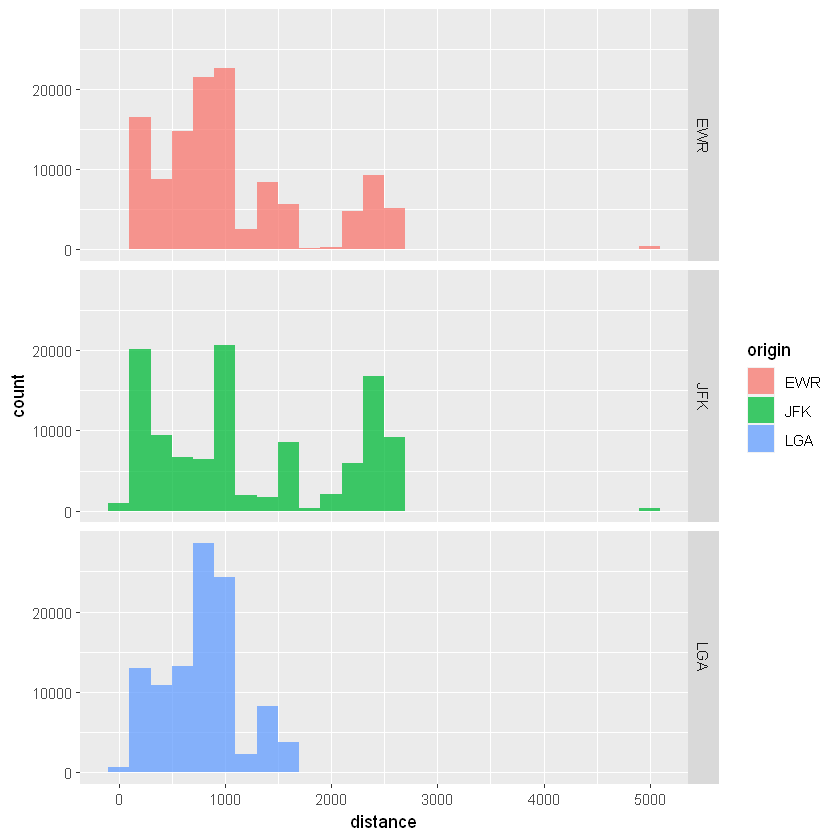

In [32]:
flights_df |>
    ggplot(aes(x=distance, fill=origin)) +
    geom_histogram(alpha=0.75, binwidth = 200) +
    facet_grid(origin~.)

# Question 1.9 Discussion 


There is a meaningful difference in the distribution of distance travelled between origin and all destinations. From the graph it looks like carriers using the JFK and EWR airports tend to travel more distances compared to carriers using the LGA airport. This might be due to the fact that JFK and LGA may be connecting hubs for flights to longer destinations as compared to LGA.

# Question 1.10 Solution 

## 1.10.a

In [46]:
# Consider a scenario in which an airline is obligated to pay a tax of $1 for each
# mile of flight. Calculate the total tax that United Airlines (UA) has paid per month


flights_df |>
    # calculating the tax paid 
    mutate(tax_paid_usd = distance) |>
    # Filtering our for UA flights
    filter(carrier == 'UA') |>
    # Find the total tax UA paid each month
    summarise(.by=month, sum_monthly_tax=sum(tax_paid_usd)) |>
    # Arrange order of the month
    arrange(month)
    


month,sum_monthly_tax
<int>,<dbl>
1,6777189
2,6239683
3,7235740
4,7580735
5,7714391
6,7833622
7,8008887
8,8162260
9,7360730


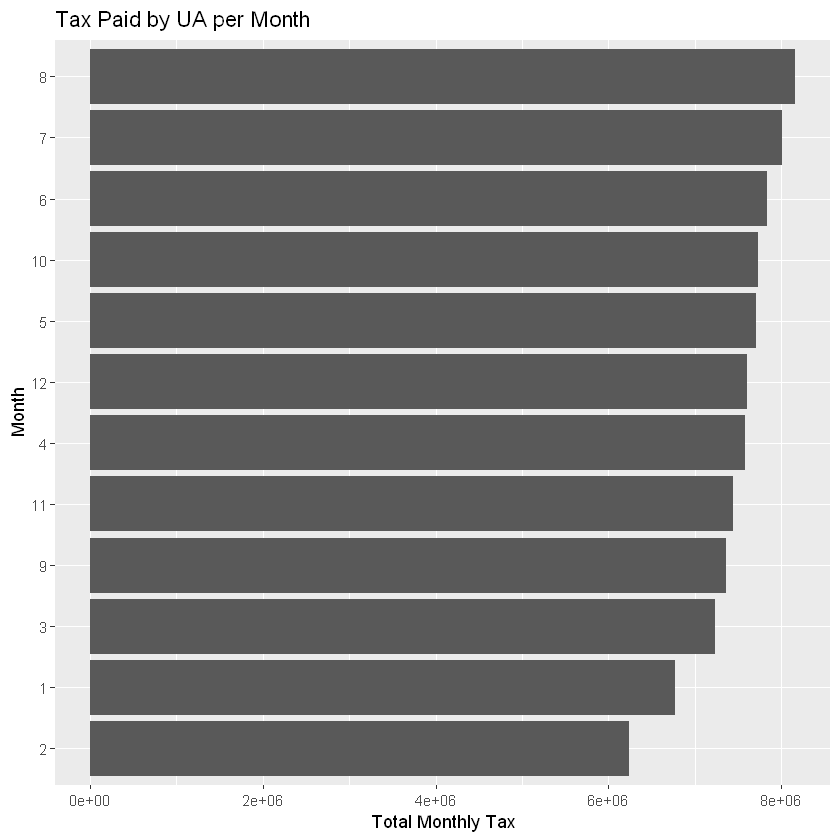

In [103]:
# Consider a scenario in which an airline is obligated to pay a tax of $1 for each
# mile of flight. Calculate the total tax that United Airlines (UA) has paid per month


flights_df |>
    # calculating the tax paid 
    mutate(tax_paid_usd = distance) |>
    # Filtering our for UA flights
    filter(carrier == 'UA') |>
    # Find the total tax UA paid each month
    summarise(.by=month, sum_monthly_tax=sum(tax_paid_usd)) |>
    # Arrange order of the month
    arrange(month) |>
    # Lets plot now
    ggplot() +
    geom_col(aes(x=reorder(factor(month), sum_monthly_tax) , y=sum_monthly_tax)) +
    labs(title = 'Tax Paid by UA per Month', x = 'Month', y = 'Total Monthly Tax') +
    coord_flip()
    


## Q1.10.b Solution

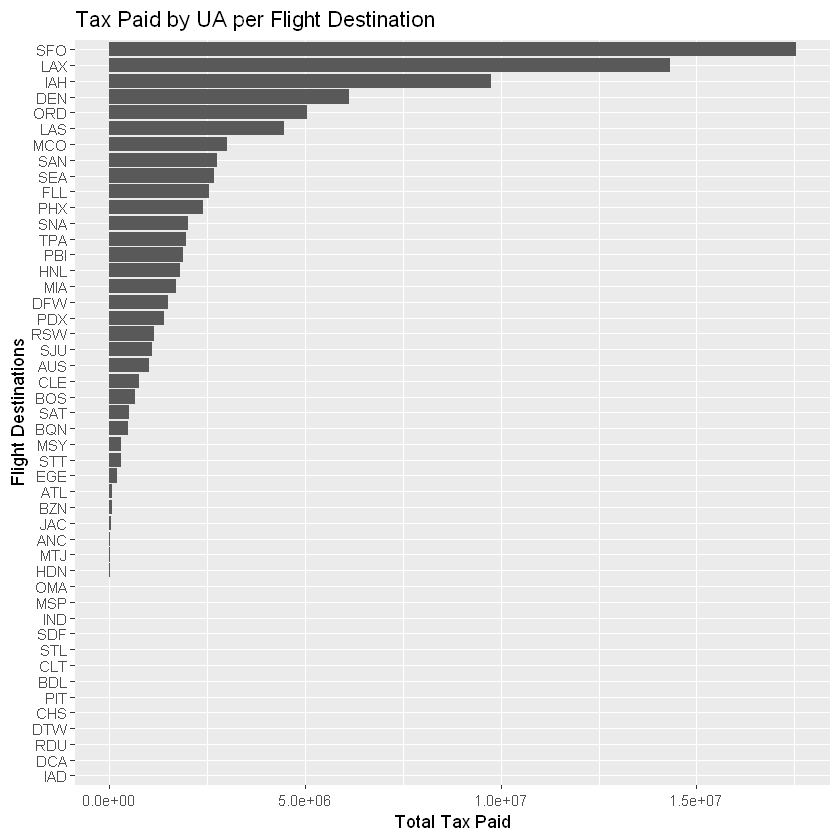

In [102]:
flights_df |>
    # calculating the tax paid 
    mutate(tax_paid_usd = distance) |>
    # Filtering our for UA flights
    filter(carrier == 'UA') |>
    # Find the total tax UA paid each month
    summarise(.by=dest, sum_monthly_tax=sum(tax_paid_usd)) |>
    # Lets plot now
    ggplot() +
    geom_col(aes(x=reorder(dest, sum_monthly_tax, width = 0.95), y=sum_monthly_tax)) +
    # Labels for the plot
    labs(title = 'Tax Paid by UA per Flight Destination', x= 'Flight Destinations', y = 'Total Tax Paid') +
    coord_flip()
    
    